In [2]:
import requests
import json
import urllib3
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime, date
from datetime import timedelta as timedelta

In [3]:
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [4]:
weight = 82

# Strava API feed

In [5]:
# Access tokens
auth_url = 'https://www.strava.com/oauth/token'
activities_url = 'https://www.strava.com/api/v3/athlete/activities'
payload = {
    'client_id': '61192', 
    'client_secret': '2c4d071cbe331679dba8dd98ca5737807c649bd5',
    'refresh_token': '064486d45898df2990c369aa127472fce092912e',
    'grant_type': "refresh_token",
    'f': 'json'
}
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']

header = {'Authorization': 'Bearer ' + f'{access_token}'}

In [6]:
# GET request for first 200 activities
param = {'per_page': 200, 'page': 1}
dataset_1 = requests.get(
    activities_url, 
    headers=header, 
    params=param).json()
activities_1 = pd.json_normalize(dataset_1)

In [7]:
# GET request for second 200 activities
param2 = {'per_page': 200, 'page': 2}
dataset_2 = requests.get(activities_url, headers=header, params=param2).json()
activities_2 = pd.json_normalize(dataset_2)

In [9]:
dataset_1[0]

{'resource_state': 2,
 'athlete': {'id': 29242296, 'resource_state': 1},
 'name': 'Tranquil ',
 'distance': 7006.6,
 'moving_time': 1990,
 'elapsed_time': 2011,
 'total_elevation_gain': 102.0,
 'type': 'Run',
 'workout_type': 0,
 'id': 5014321946,
 'external_id': 'garmin_push_6495888252',
 'upload_id': 5347051889,
 'start_date': '2021-03-26T16:14:37Z',
 'start_date_local': '2021-03-26T16:14:37Z',
 'timezone': '(GMT+00:00) Europe/London',
 'utc_offset': 0.0,
 'start_latlng': [51.641077, -0.72134],
 'end_latlng': [51.641141, -0.721298],
 'location_city': None,
 'location_state': None,
 'location_country': 'United Kingdom',
 'start_latitude': 51.641077,
 'start_longitude': -0.72134,
 'achievement_count': 0,
 'kudos_count': 4,
 'comment_count': 0,
 'athlete_count': 1,
 'photo_count': 0,
 'map': {'id': 'a5014321946',
  'summary_polyline': 'ucezHj{kCAx@BXV~@BR?XCDe@TWRY\\a@n@Ud@_BxFi@dBIx@y@lCo@xCYr@}@nBoDbFoA~BmAtAc@NUWeAgCq@eBg@aBc@uBe@_EK[Yq@Ga@IYAkAKwA@uAKcDIgAMy@GkBIcA?o@RQ`@ONKRW\\Mh@_

In [8]:
activities = pd.concat([activities_1, activities_2])
cols = [
    'name', 'upload_id', 'type', 'distance', 'moving_time',   
         'average_speed', 'max_speed', 'average_cadence',
        'total_elevation_gain','average_heartrate', 'max_heartrate', 
        'start_date_local',
       ]

activities = activities[cols]

In [9]:
activities['start_date_local'] = pd.to_datetime(activities['start_date_local'])
activities['start_time'] = activities['start_date_local'].dt.time
activities['start_date_local'] = activities['start_date_local'].dt.date

In [10]:
runs = activities.loc[activities['type'] == 'Run']
runs = runs.drop(['type'], axis = 1)

In [11]:
runs.head()

,name,upload_id,distance,moving_time,average_speed,max_speed,average_cadence,total_elevation_gain,average_heartrate,max_heartrate,start_date_local,start_time
0,Top park,5.151254e+09,6539.2,1843,3.548,4.8,83.7,30.0,146.3,163.0,2021-02-22,06:51:28
1,Sat shift,5.141204e+09,15263.5,4640,3.290,7.3,83.1,174.0,155.1,176.0,2021-02-20,15:18:05
2,Friyay,5.132506e+09,6385.1,1876,3.404,5.8,84.1,89.0,164.3,181.0,2021-02-19,07:02:33
3,Wake up,5.121727e+09,6302.1,1830,3.444,5.2,84.2,90.0,149.0,163.0,2021-02-17,06:54:45
4,Tempo 🌶,5.111858e+09,6717.9,1781,3.772,5.3,83.8,38.0,144.9,174.0,2021-02-15,11:47:45


In [12]:
runs = runs.dropna()

In [13]:
def pace(row):
    pace = 1000 / row['average_speed']
    return pace

In [14]:
runs['pace_in_sec'] = runs.apply(pace, axis=1)

In [15]:
runs.head()

,name,upload_id,distance,moving_time,average_speed,max_speed,average_cadence,total_elevation_gain,average_heartrate,max_heartrate,start_date_local,start_time,pace_in_sec
0,Top park,5.151254e+09,6539.2,1843,3.548,4.8,83.7,30.0,146.3,163.0,2021-02-22,06:51:28,281.848929
1,Sat shift,5.141204e+09,15263.5,4640,3.290,7.3,83.1,174.0,155.1,176.0,2021-02-20,15:18:05,303.951368
2,Friyay,5.132506e+09,6385.1,1876,3.404,5.8,84.1,89.0,164.3,181.0,2021-02-19,07:02:33,293.772033
3,Wake up,5.121727e+09,6302.1,1830,3.444,5.2,84.2,90.0,149.0,163.0,2021-02-17,06:54:45,290.360046
4,Tempo 🌶,5.111858e+09,6717.9,1781,3.772,5.3,83.8,38.0,144.9,174.0,2021-02-15,11:47:45,265.111347


In [16]:
len(runs)

231

# Stats

In [44]:
def power(row):
    # TSOR formula
    ecor = 1.04 # energy cost of running given air resistance
    power = row['average_speed'] * ecor * weight
    return round(power)

In [45]:
def vo2_max(row):
    # TSOR formula
    velocity = (row['distance'] / 1000) / (row['moving_time'] / 3600) # km / hour
    vo2max = 3.77 * velocity
    return round(vo2max)

# Time series

In [31]:
def pace_plot(x):
    m = int(x / 60)
    s = int(x - (60 * m))
    return '%(m)01d:%(s)02d' % {'m': m, 's': s}

In [32]:
def pace_to_dt(x):
    return datetime.strptime(x, '%M:%S')

In [ ]:
ts = runs.copy()
ts['pace_not_dt'] = ts['pace_in_sec'].apply(pace_plot)
ts['pace'] = ts['pace_not_dt'].apply(pace_to_dt)
ts.columns = ['Name', 'Upload ID', 'Distance', 'Moving Time', 'Avg speed', 'Max speed', 'Avg cadence', 'Total elevation gain', 'Avg HR', 'Max HR', 'Date', 'Start time', 'Pace in sec', 'Pace not dt', 'Pace']

In [ ]:
ts.head()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=ts['Date'], y=ts['Avg HR'], name="Avg HR"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=ts['Date'], y=ts['Max HR'], name="Max HR"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=ts['Date'], y=ts['Pace'], name="Pace"),
    secondary_y=False,
)

fig.update_layout(
    title_text="Pace vs Heart rate trends"
)

# Set x-axis title
fig.update_xaxes(
    title_text="Date",
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_yaxes(title_text="Heart Rate", secondary_y=True)
fig.update_yaxes(title_text="Pace", secondary_y=False, autorange='reversed')

fig.update_layout(
    template='plotly_white',
    yaxis=dict(
        title='Pace',
        tickformat='%M:%S'
    )
)

fig.show()

## Correlations

In [241]:
corr_data = runs.copy()
corr_data = corr_data.drop(['upload_id', 'max_speed', 'max_heartrate', 'pace_in_sec', 'start_time', 'start_date_local'], axis=1)
corr_data.columns = ['Name', 'Distance', 'Moving Time', 'Avg speed', 'Avg cadence', 'Total elevation gain', 'Avg HR']
corr_data.head()

,Name,Distance,Moving Time,Avg speed,Avg cadence,Total elevation gain,Avg HR
0,Top park,6539.2,1843,3.548,83.7,30.0,146.3
1,Sat shift,15263.5,4640,3.290,83.1,174.0,155.1
2,Friyay,6385.1,1876,3.404,84.1,89.0,164.3
3,Wake up,6302.1,1830,3.444,84.2,90.0,149.0
4,Tempo 🌶,6717.9,1781,3.772,83.8,38.0,144.9


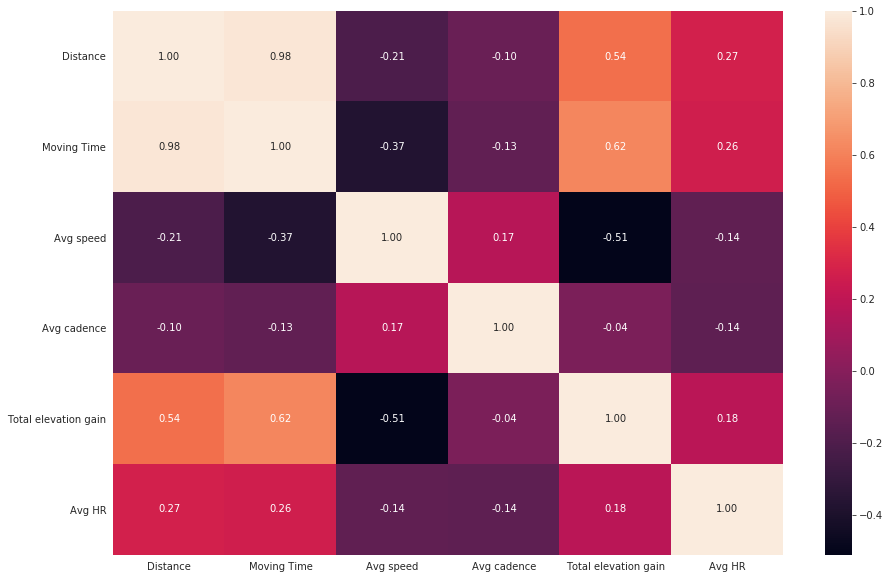

In [242]:
corr = corr_data.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot=True, fmt=".2f");

# Workout trends

In [ ]:
trends = runs.copy()
trends = trends.drop(['name', 'upload_id', 'start_time'], axis = 1)
trends.set_index('start_date_local', inplace=True)
trends.set_index(pd.to_datetime(trends.index), drop=True, inplace=True)

In [ ]:
trends['weekday'] = trends.index.map(lambda x: x.weekday)
trends['moving_time'] = trends['moving_time'].apply(lambda x: x / 60)

In [ ]:
trends.head()

### Weekday

In [ ]:
weekday = trends.groupby('weekday').mean()

In [ ]:
import calendar
days = list(calendar.day_name)

In [ ]:
weekday['days'] = list(calendar.day_name)

In [ ]:
weekday

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
fig = sns.barplot(x = 'days', y='average_speed', data=weekday, palette=sns.color_palette('husl', 9))

ax.set_title('Average training time by weekday')
ax.set_xlabel('')
ax.set_ylabel('Time (min)');

### Yearly

In [ ]:
trends['year'] = trends.index.map(lambda x: x.year)
trends['year'].value_counts()

In [ ]:
yearly = trends.groupby('year').mean()

In [ ]:
yearly

In [ ]:
yearly['years'] = yearly.index

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
fig = sns.barplot(x ='years', y='moving_time', data=yearly, palette=sns.color_palette('husl', 9))

ax.set_title('Average training time by year')
ax.set_xlabel('')
ax.set_ylabel('Time (min)');

## Scaling

In [165]:
display = runs.copy()
display['pace_not_dt'] = display['pace_in_sec'].apply(pace_plot)
display['vo2_max'] = display.apply(vo2_max, axis=1)
display['power'] = display.apply(power, axis=1)
display = display.set_index('start_date_local')
display['date'] = display.index
start_date = date(2021, 1, 1)
end_date = date.today()
display = display.loc[end_date : start_date]
display.head()

,name,upload_id,distance,moving_time,average_speed,max_speed,average_cadence,total_elevation_gain,average_heartrate,max_heartrate,start_time,pace_in_sec,pace_not_dt,vo2_max,power,date
start_date_local,,,,,,,,,,,,,,,,
2021-02-22,Top park,5.151254e+09,6539.2,1843,3.548,4.8,83.7,30.0,146.3,163.0,06:51:28,281.848929,4:41,48,303,2021-02-22
2021-02-20,Sat shift,5.141204e+09,15263.5,4640,3.290,7.3,83.1,174.0,155.1,176.0,15:18:05,303.951368,5:03,45,281,2021-02-20
2021-02-19,Friyay,5.132506e+09,6385.1,1876,3.404,5.8,84.1,89.0,164.3,181.0,07:02:33,293.772033,4:53,46,290,2021-02-19
2021-02-17,Wake up,5.121727e+09,6302.1,1830,3.444,5.2,84.2,90.0,149.0,163.0,06:54:45,290.360046,4:50,47,294,2021-02-17
2021-02-15,Tempo 🌶,5.111858e+09,6717.9,1781,3.772,5.3,83.8,38.0,144.9,174.0,11:47:45,265.111347,4:25,51,322,2021-02-15


In [166]:
unscaled = display.drop(['name', 'upload_id', 'start_time', 'start_time', 'pace_in_sec', 'pace_not_dt', 'vo2_max', 'date', 'power'], axis = 1)

In [167]:
import sklearn
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(unscaled)

In [168]:
scaled_runs = pd.DataFrame(X, columns=['distance', 'moving_time', 'average_speed', 'max_speed', 'average_cadence', 
                                       'total_elevation_gain', 'average_heartrate', 'max_heartrate'])

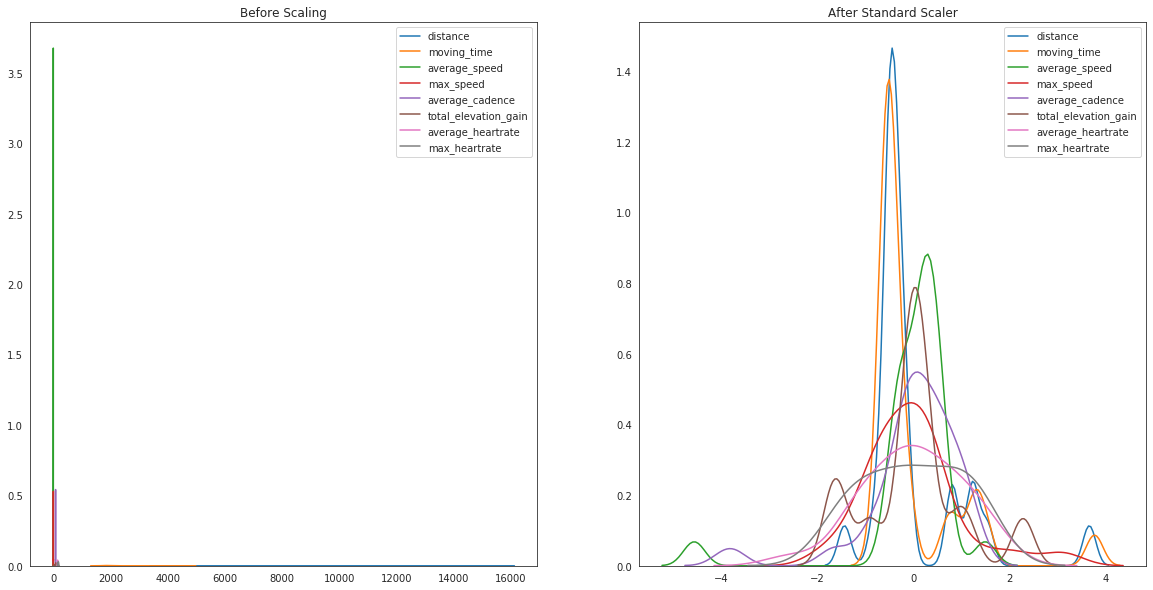

In [169]:
sns.set_style('white')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

ax1.set_title('Before Scaling')
sns.kdeplot(unscaled['distance'], ax=ax1)
sns.kdeplot(unscaled['moving_time'], ax=ax1)
sns.kdeplot(unscaled['average_speed'], ax=ax1)
sns.kdeplot(unscaled['max_speed'], ax=ax1)
sns.kdeplot(unscaled['average_cadence'], ax=ax1)
sns.kdeplot(unscaled['total_elevation_gain'], ax=ax1)
sns.kdeplot(unscaled['average_heartrate'], ax=ax1)
sns.kdeplot(unscaled['max_heartrate'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_runs['distance'], ax=ax2)
sns.kdeplot(scaled_runs['moving_time'], ax=ax2)
sns.kdeplot(scaled_runs['average_speed'], ax=ax2)
sns.kdeplot(scaled_runs['max_speed'], ax=ax2)
sns.kdeplot(scaled_runs['average_cadence'], ax=ax2)
sns.kdeplot(scaled_runs['total_elevation_gain'], ax=ax2)
sns.kdeplot(scaled_runs['average_heartrate'], ax=ax2)
sns.kdeplot(scaled_runs['max_heartrate'], ax=ax2)

plt.show()

## Clustering

In [214]:
slider_input = 5

In [215]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=slider_input)
model.fit(X)
scaled_runs['cluster'] = model.labels_
scaled_runs['cluster'].value_counts()

0    11
2     8
4     4
1     2
3     1
Name: cluster, dtype: int64

In [216]:
# find optimal k using elbow method
sum_of_squared_distances = []
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

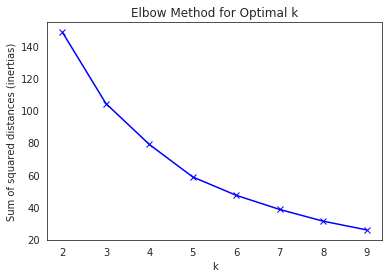

In [217]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances (inertias)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [218]:
# find optimal k using silhouette scores
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in K:
    model = KMeans(n_clusters=k)
    model = model.fit(X)
    ss = silhouette_score(X, model.labels_)
    silhouette_scores.append(ss)

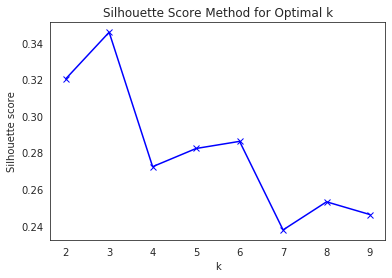

In [219]:
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score Method for Optimal k')
plt.show()

In [220]:
clustered = display.copy()
clustered = clustered.reset_index(drop=True)
clustered['cluster'] = scaled_runs['cluster']

In [221]:
cluster_counts = pd.DataFrame(clustered['cluster'].value_counts())
cluster_counts.columns = ['#runs in cluster']
cluster_counts.index.rename('Cluster id', inplace=True)

,#runs in cluster
Cluster id,
0,11
2,8
4,4
1,2
3,1


In [229]:
sorted(list(cluster_counts.index))

[0, 1, 2, 3, 4]

In [230]:
cluster_counts.index.name

'Cluster id'

In [222]:
clustered = clustered.drop(['upload_id', 'moving_time', 'average_speed', 
                            'max_speed', 'average_cadence', 'average_heartrate',
                            'max_heartrate', 'start_time', 'pace_in_sec'], axis=1)
clustered['distance'] = clustered['distance'].apply(lambda x: round(x/1000, 2))
clustered = clustered.set_index('date')
clustered.columns = ['Name', 'Distance', 'Total elevation gain', 'Pace', 'VO2 max', 'Power', 'Cluster']

In [223]:
clustered.head()

,Name,Distance,Total elevation gain,Pace,VO2 max,Power,Cluster
date,,,,,,,
2021-02-22,Top park,6.54,30.0,4:41,48,303,0
2021-02-20,Sat shift,15.26,174.0,5:03,45,281,1
2021-02-19,Friyay,6.39,89.0,4:53,46,290,2
2021-02-17,Wake up,6.30,90.0,4:50,47,294,0
2021-02-15,Tempo 🌶,6.72,38.0,4:25,51,322,0


In [224]:
clustered[clustered['Cluster'] == 0]

,Name,Distance,Total elevation gain,Pace,VO2 max,Power,Cluster
date,,,,,,,
2021-02-22,Top park,6.54,30.0,4:41,48,303,0
2021-02-17,Wake up,6.30,90.0,4:50,47,294,0
2021-02-15,Tempo 🌶,6.72,38.0,4:25,51,322,0
2021-02-05,Manlike moon,6.30,91.0,4:47,47,297,0
2021-02-03,Soundd,7.02,90.0,4:49,47,295,0
2021-02-01,Fresh,6.26,79.0,4:41,48,303,0
2021-01-30,Afternoon yomp,6.37,93.0,4:41,48,303,0
2021-01-27,Morning Run,6.33,87.0,4:46,47,298,0
2021-01-22,Morning Run,6.33,104.0,4:43,48,301,0


## Radar plot

In [ ]:
radar_data = runs.copy()
radar_data = radar_data[:50]
radar_data['vo2_max'] = radar_data.apply(vo2_max, axis=1)
radar_data.set_index('name', inplace=True)
radar_data = radar_data.drop(['upload_id', 'max_speed', 'average_cadence', 
                              'max_heartrate', 'start_date_local', 'start_time', 'pace_in_sec', 'moving_time'], axis=1)

In [ ]:
radar_data.head()

In [ ]:
raw = radar_data.copy()

from sklearn import preprocessing
x = raw.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized = pd.DataFrame(x_scaled, columns=['distance', 'average_speed', 'total_elevation_gain',
       'average_heartrate', 'vo2_max'])
normalized.set_index(radar_data.index, inplace=True)
normalized = normalized.apply(lambda x: x*5, axis=1)

In [ ]:
normalized.head()

In [ ]:
normalized = normalized[['average_heartrate', 'average_speed', 'distance', 'total_elevation_gain', 'vo2_max']]

In [ ]:
normalized.index[0]

In [ ]:
import plotly.graph_objects as go
import plotly.offline as pyo

categories = ['HR', 'Speed', 'Distance', 'Elevation', 'VO2 max']
categories = [*categories, categories[0]]

run_1 = normalized.iloc[0]
run_2 = normalized.iloc[1]
run_3 = normalized.iloc[2]
run_1 = [*run_1, run_1[0]]
run_2 = [*run_2, run_2[0]]
run_3 = [*run_3, run_3[0]]
run_1_title = normalized.index[0]
run_2_title = normalized.index[1]
run_3_title = normalized.index[2]

fig = go.Figure(
    data=[
        go.Scatterpolar(r=run_1, theta=categories, fill='toself', name=f'{run_1_title}'),
        go.Scatterpolar(r=run_2, theta=categories, fill='toself', name=f'{run_2_title}'),
        go.Scatterpolar(r=run_3, theta=categories, fill='toself', name=f'{run_3_title}')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Last 3 runs'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)